In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [48]:
data=pd.read_excel(r"C:\Users\OM RAJ PANDEY\Desktop\Data_Train.xlsx")

In [49]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


By observing the dataset we get noticed, the Route column contains a list of cities which we will need to separate, since we would have multiple combinations in our dataset.
The Arrival_time column has dates attached along with, which we will need to separate.
The Duration, Date_of_Journy column are in a string format, which need to convert to integer type.
The Total_stops column has word 'stops' added along with the number of stops, and Dep_Time, Duration columns are also not in an appropriate form which we need to convert into integer.

In [50]:
# Check the data types of data and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [51]:
# There is very less null columns so we drop the null columns.
data.dropna(inplace=True)

We see in this data all the dependent column are 'object' datatype so as to use these columns properly for model we have to convert these datatype into appropriate form.

The bar graph is very convenient while comparing categories of data. It helps to track changes over time. It is best for visualizing discrete data.

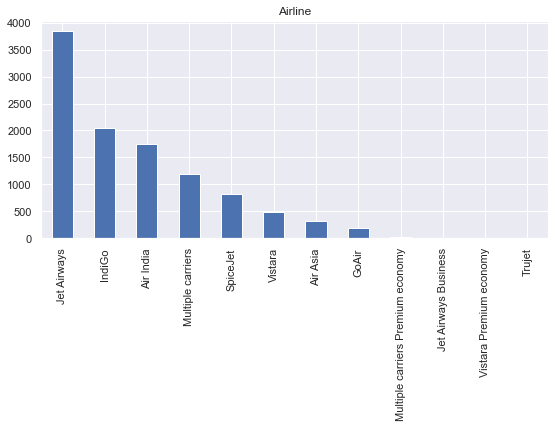

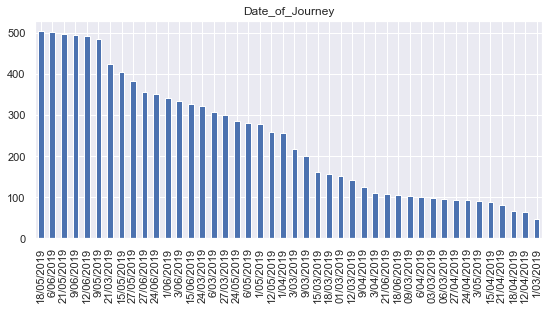

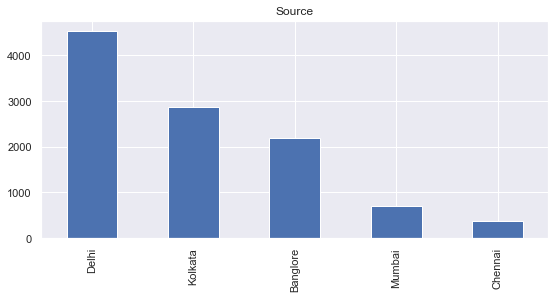

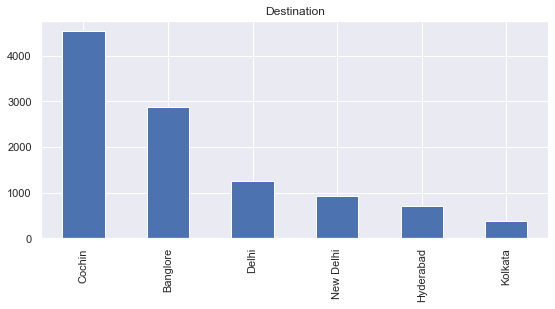

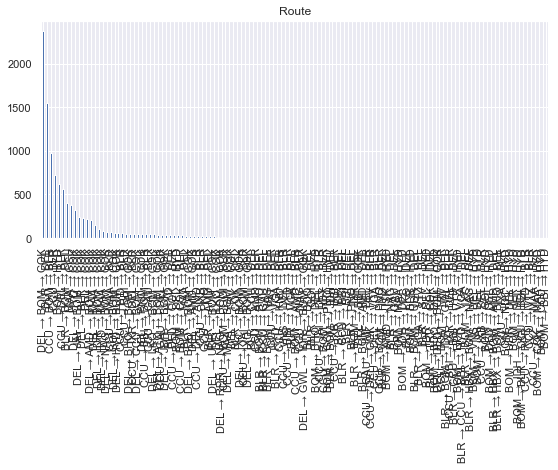

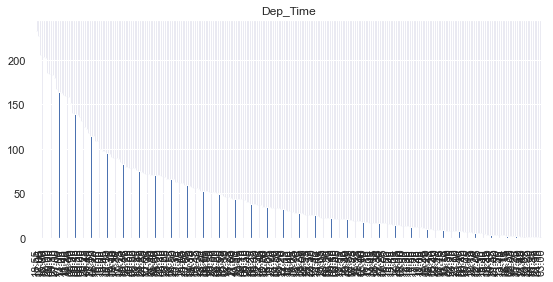

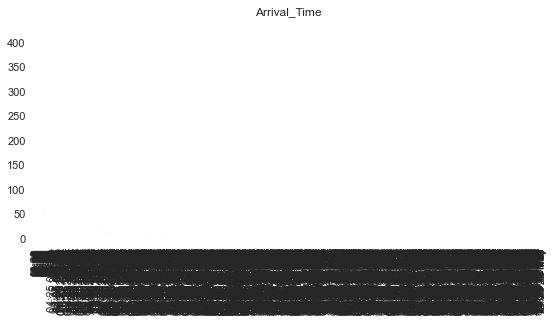

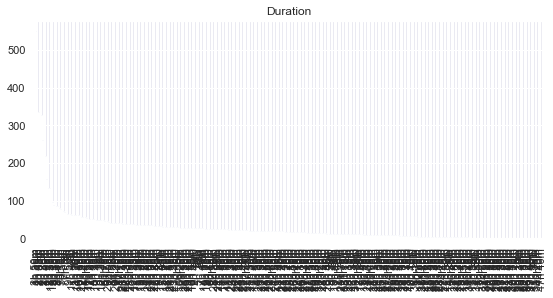

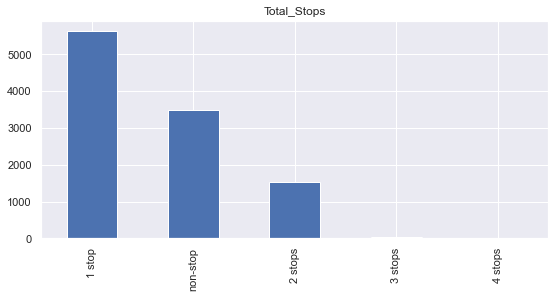

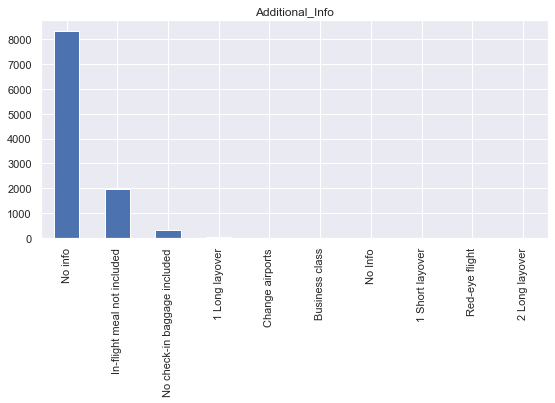

In [53]:
#univariate analysis
# Selecting the categorical columns
categorical_col=data.select_dtypes(include=['object']).columns

#plotting a bar chart for each of the categorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia. Jet Airways business is the costliest airways.
Count for Vistara Premium economy, Trujet, Multiple caries premium economy and Jet airways business is quite low.

After Data Analysis we'll try to deal with above stuff in Feature Engineering as follows.

In [54]:
# Duplicate values
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


Here we will be removing those repeated values from the dataset and keeping the in-place attribute to be true so that there will be no changes.

In [55]:
data.drop_duplicates(keep='first',inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [56]:
data.shape

(10462, 11)

Checking the Additional_info coumn and hving the count of uique types of values.

In [57]:
data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [58]:
#Checking the different Airlines
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [59]:
#Checking the different Airline Routes
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

# Feature Engineering

In [60]:
# Converting the hours in minute
data['Duration']=data['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [61]:
# Organizing the format of the date of journey in our dataset for better preprocessing in the model stage.
data["Journey_day"]=data['Date_of_Journey'].str.split('/').str[0].astype(int)
data["Journey_month"]=data['Date_of_Journey'].str.split('/').str[1].astype(int)
data.drop(['Date_of_Journey'],axis=1, inplace=True)

In [62]:
#We are converting departure time into hours and minutes
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute
data.drop(['Dep_Time'],axis=1,inplace=True)

In [63]:
# We converting the arrival time into hours and minutes.
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [64]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


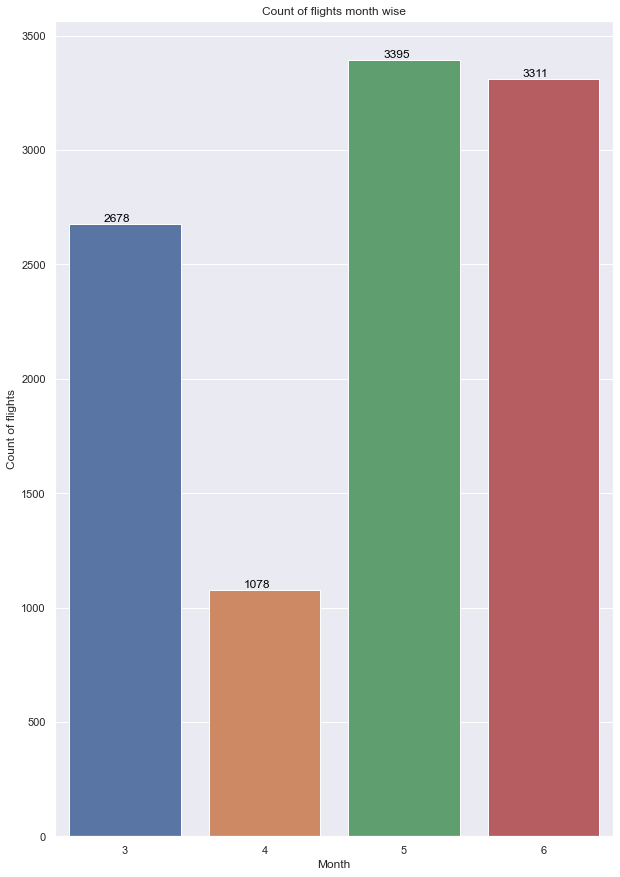

In [65]:
# Plotting Bar chart for Months(Duration)vs Number of Flights
plt.figure(figsize=(10,15))
plt.title('Count of flights month wise')
ax=sns.countplot(x='Journey_month',data=data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va='bottom',color='black')

In the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

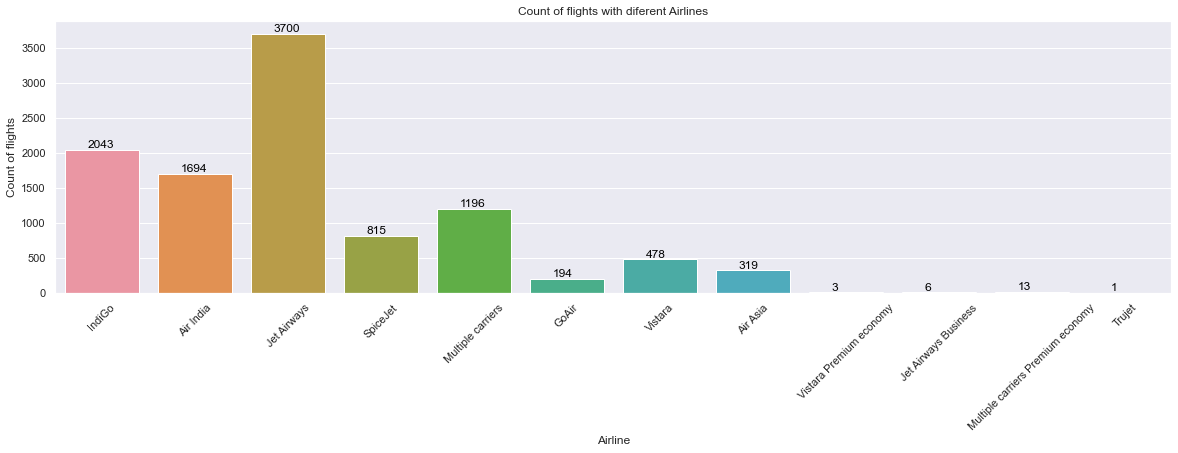

In [66]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize=(20,5))
plt.title('Count of flights with diferent Airlines')
ax=sns.countplot(x='Airline',data=data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va='bottom',color='black')

In the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight oarded.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

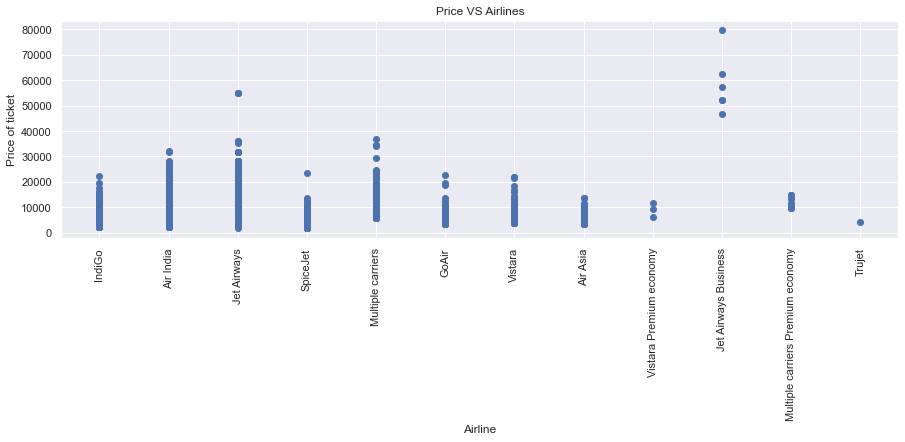

In [67]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize=(15,4))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'],data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation=90)

# Correlation between all Features

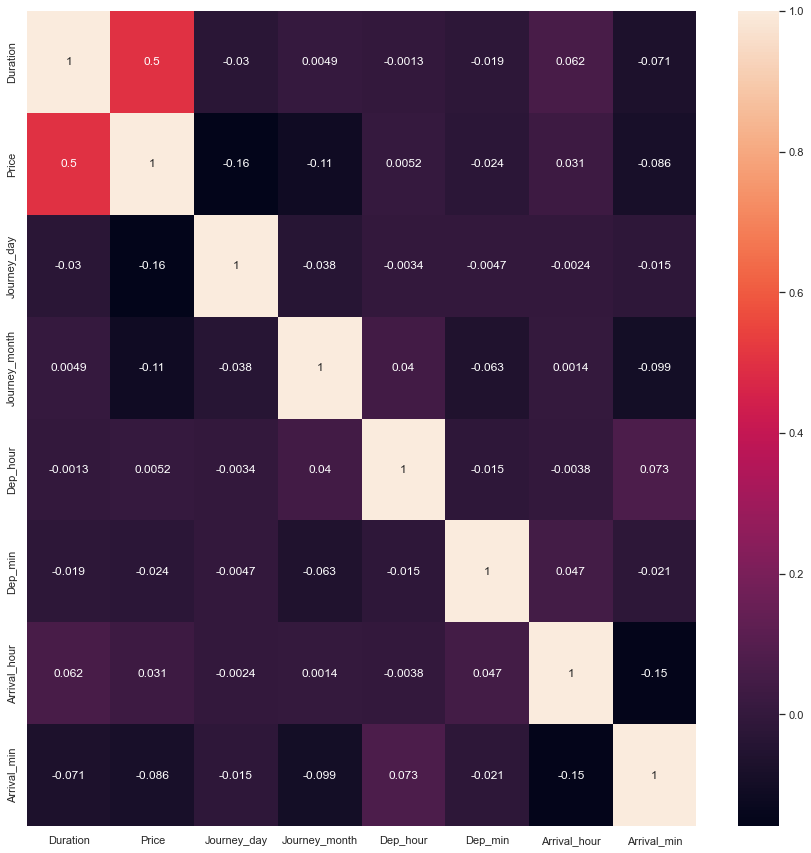

In [68]:
# Plotting Correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,)
plt.show()

In [69]:
# Dealing with categorical Data and Numerical Data
categorical_data=data.select_dtypes(exclude=['int64','float','int32'])
numerical_data=data.select_dtypes(include=['int64','float','int32'])
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le=LabelEncoder()
categorical_data=categorical_data.apply(LabelEncoder().fit_transform)
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [72]:
# Concatenating both Categorical data and Numerical data and divide the dataset into x and y
df0=pd.concat([categorical_data,numerical_data],axis=1)
x=df0.drop(['Price'],axis=1)
y=df0['Price']

In [73]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [74]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Model Building

In [75]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
# Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
# Model Training
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [78]:
# Prediction on Test data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [79]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [80]:
df1

,Actual,lr,svm,rf,gr
2150,17996,15719.273584,9606.468317,14999.15,16937.325074
3784,3873,5323.446336,7166.639225,3871.12,4142.526607
714,4462,4406.395227,7210.963409,4317.70,4887.999195
7558,2228,3870.504867,7106.418884,2324.73,2707.127757
7413,4991,5193.922332,7211.642322,4287.72,4193.294378
...,...,...,...,...,...
653,12898,10259.003949,9457.921138,12898.00,11005.016663
8607,12898,9519.896472,9404.059312,12425.69,11154.992949
10261,11627,12598.623461,9543.622271,10363.55,10848.044011
10581,6795,11276.956320,8416.144916,7383.02,11090.020713


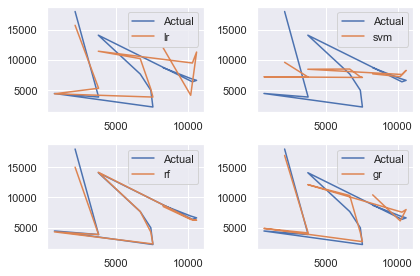

In [81]:
#Compare performance visually
plt.subplot(221) 
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.tight_layout()
plt.legend()

In [82]:
# Evaluatin the algorithm
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [83]:
print(score1, score2, score3, score4)

0.4299893323830063 0.1649747454175824 0.8889769570574348 0.8195928819323318


On the basis of r2_score we can say Random Forest is our best model.

In [84]:
# Mean absolute error
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [85]:
print(s1, s2, s3, s4)

2489.462235358401 3051.5557746197655 669.1140153952327 1236.4009162125512


In [86]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [87]:
# Predict New price
df2={'Airline':4,'Source':3,'Destination':5,'Route':84,'Total_Stops':1,'Additional_Info':8,'Duration':1140,'Journey_day':9,'Journey_month':6,'Dep_hour':18,'Dep_min':25,'Arrival_hour':13,'Arrival_min':35}
df3=pd.DataFrame(df2,index=[0])

In [88]:
new_pred=rf.predict(df3)
print(new_pred)

[15317.34]


# Model Saving

In [89]:
# Save Model Using Joblib
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [90]:
import joblib

In [91]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [92]:
model=joblib.load('model_joblib_rf')

In [93]:
model.predict(df3)

array([13851.89])